In [1]:
from student_client import create_student_gym_env

step_size = 10
env = create_student_gym_env(step_size=step_size)

2026-02-07 15:22:41,349 - student_client.student_gym_env - WARNING - No .env file found and no explicit parameters provided. Using default values. For better setup, create a .env file with:
SERVER_URL=http://localhost:8001
USER_TOKEN=student_user
ENV_TYPE=DegradationEnv
MAX_STEPS_PER_EPISODE=1000
AUTO_RESET=True
TIMEOUT=30.0
2026-02-07 15:22:41,580 - student_client.student_gym_env - INFO - Created new session: 6fe2810d-b1ab-48c9-acde-886232e88ec1
2026-02-07 15:22:42,627 - student_client.student_gym_env - INFO - Created new episode: 9a012303-72f2-41fe-bd76-1dab2bfd2027
2026-02-07 15:22:42,628 - student_client.student_gym_env - INFO - StudentGymEnv initialized with episode 9a012303-72f2-41fe-bd76-1dab2bfd2027


In [2]:
# Reset environment to get initial observation
obs, info = env.reset()
print(f"📋 Starting episode {info.get('episode_id', 'unknown')}")

obs.shape, info

2026-02-07 15:22:44,474 - student_client.student_gym_env - INFO - Episode 9a012303-72f2-41fe-bd76-1dab2bfd2027 reset successfully


📋 Starting episode 9a012303-72f2-41fe-bd76-1dab2bfd2027


((9,),
 {'step': 0,
  'episode_id': '9a012303-72f2-41fe-bd76-1dab2bfd2027',
  'terminated': False,
  'truncated': False})

In [3]:

# Initialize data collection arrays
observations = []
actions = []
rewards = []
total_timesteps = 0


for step in range(50):
    #time.sleep(2)

    # Choose a random action (0=do nothing, 1=repair, 2=sell)
    action = env.action_space.sample()
    action = 0

    if step % 4 == 0 and step > 0:
        action = 1
    if step >= 30:
        action = 2

    # Take step in environment
    #obs, reward, terminated, truncated, info = env.step(action, step_size=10, return_all_states=True)

    obs_result, reward, terminated, truncated, info = env.step(
        action=action, step_size=step_size, return_all_states=True
    )

    # Handle the observation result
    if isinstance(obs_result, list):
        # Multiple observations returned
        observations.extend(obs_result)
        # Action is applied at the first timestep of this interval
        actions.append(action)
        if action != 2:
            actions.extend([0] * (len(obs_result)-1)) # fill with no actions
    else:
        actions.append(action)

    rewards.append(reward)

    # Update total timesteps - server advances by step_size but returns only final observation
    total_timesteps += step_size

    # Print progress every step
    if step % 1 == 0:
        print(f" Step {total_timesteps}: Reward={reward:.2f}, Total={sum(rewards):.2f}")

    # Check if episode ended
    if terminated or truncated:
        print(f"🏁 Episode ended at step {total_timesteps} with reward={reward:.2f}")
        break


# Print summary statistics
total_reward = sum(rewards)
print(f"\n Episode Summary:")
print(f"   Total Steps: {len(actions)}")
print(f"   Total Reward: {total_reward:.2f}")
print(f"   Actions Taken: {len([a for a in actions if a == 1])} repairs, {len([a for a in actions if a == 2])} sell")

# Finish episode
env.close()

 Step 10: Reward=485.65, Total=485.65
 Step 20: Reward=423.14, Total=908.79
 Step 30: Reward=385.25, Total=1294.04
 Step 40: Reward=339.43, Total=1633.47
 Step 50: Reward=-492.27, Total=1141.19
 Step 60: Reward=305.68, Total=1446.88
 Step 70: Reward=258.89, Total=1705.76
 Step 80: Reward=210.33, Total=1916.09
 Step 90: Reward=-529.71, Total=1386.38
 Step 100: Reward=438.81, Total=1825.19
 Step 110: Reward=458.33, Total=2283.52
 Step 120: Reward=424.65, Total=2708.17
 Step 130: Reward=-521.41, Total=2186.76
 Step 140: Reward=436.38, Total=2623.14
 Step 150: Reward=178.40, Total=2801.55
 Step 160: Reward=162.31, Total=2963.86
 Step 170: Reward=-516.81, Total=2447.05
 Step 180: Reward=117.28, Total=2564.33
 Step 190: Reward=87.47, Total=2651.80


2026-02-06 18:23:27,852 - student_client.student_gym_env - INFO - Closed environment 18b9214d-38bb-4ee1-9356-1f80500de755


Episode 18b9214d-38bb-4ee1-9356-1f80500de755 reached termination state, reason: failure
 Step 200: Reward=-1000.00, Total=1651.80
🏁 Episode ended at step 200 with reward=-1000.00

 Episode Summary:
   Total Steps: 199
   Total Reward: 1651.80
   Actions Taken: 4 repairs, 0 sell


In [4]:
len(observations), len(actions)

(199, 199)

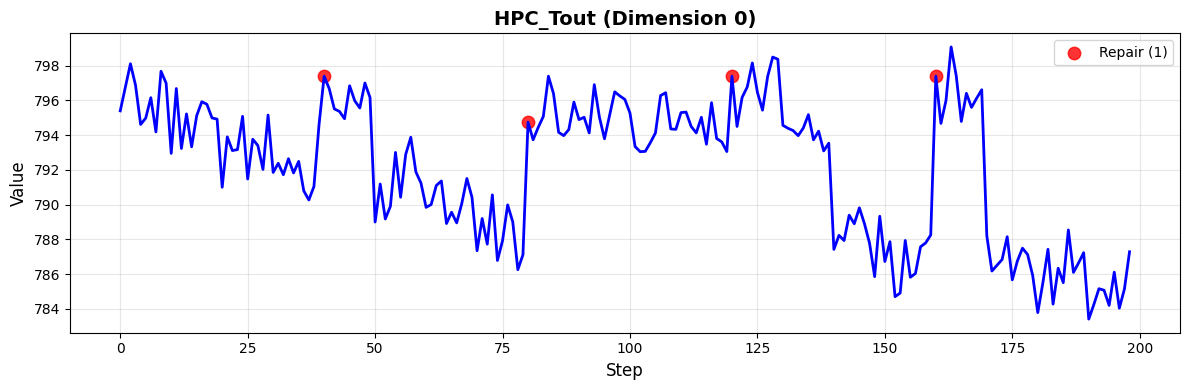

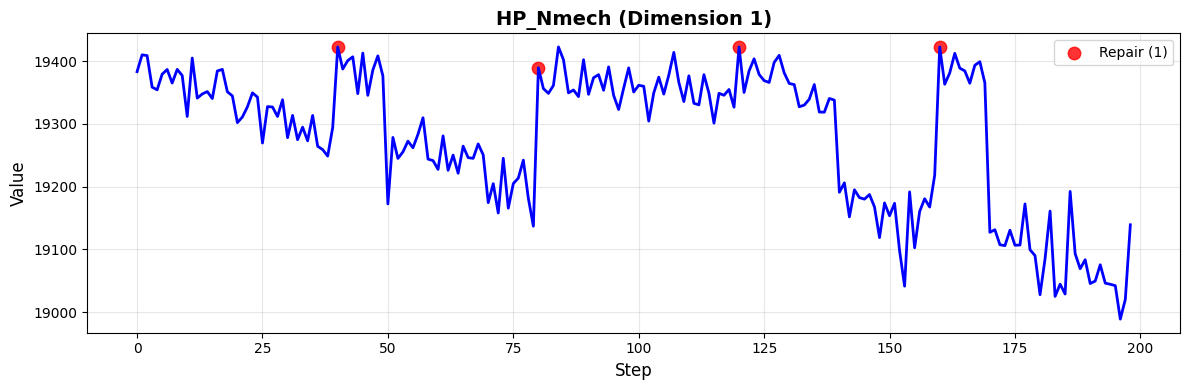

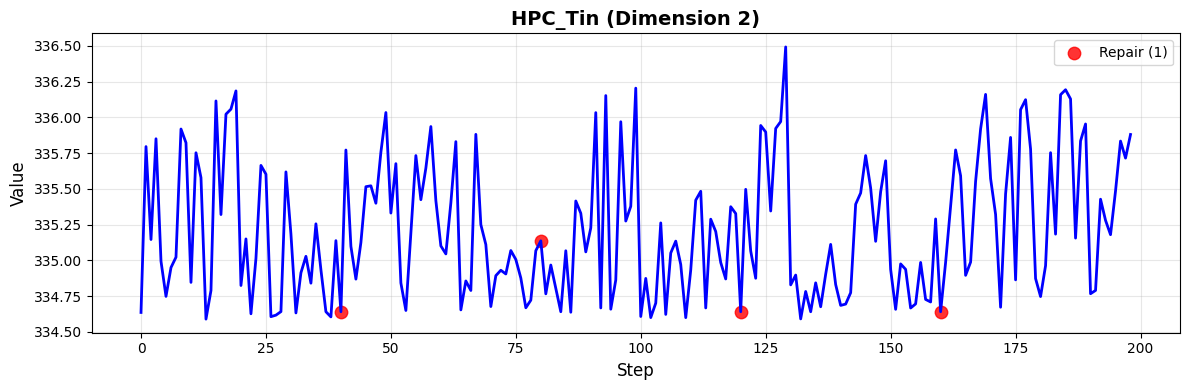

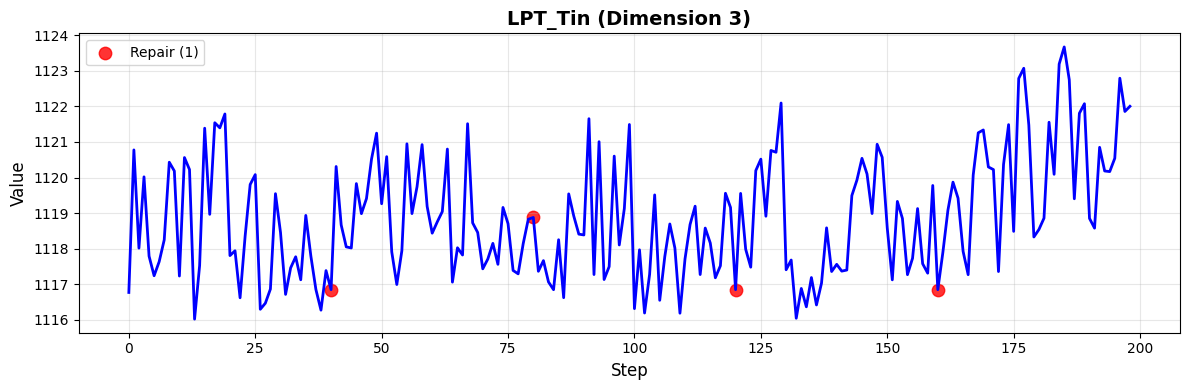

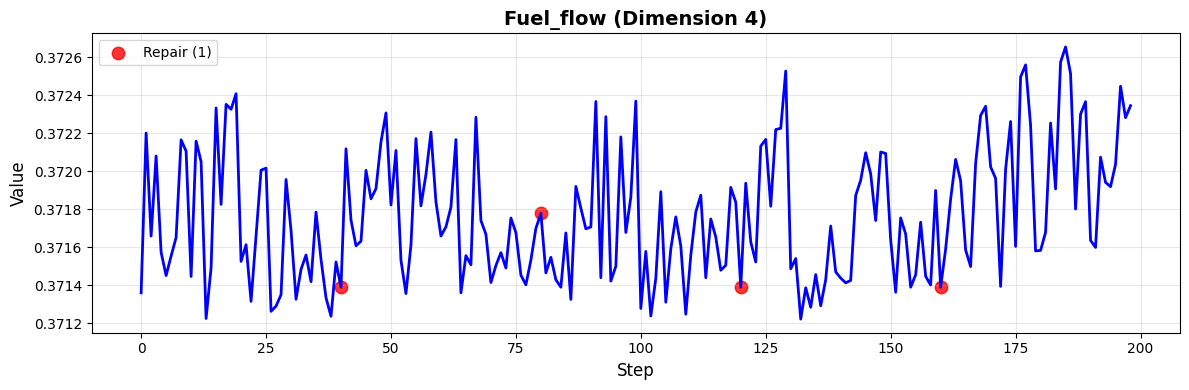

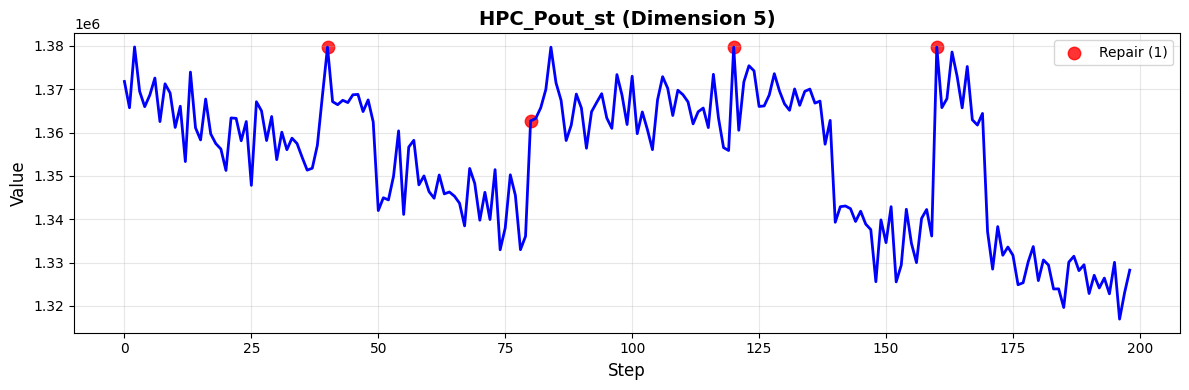

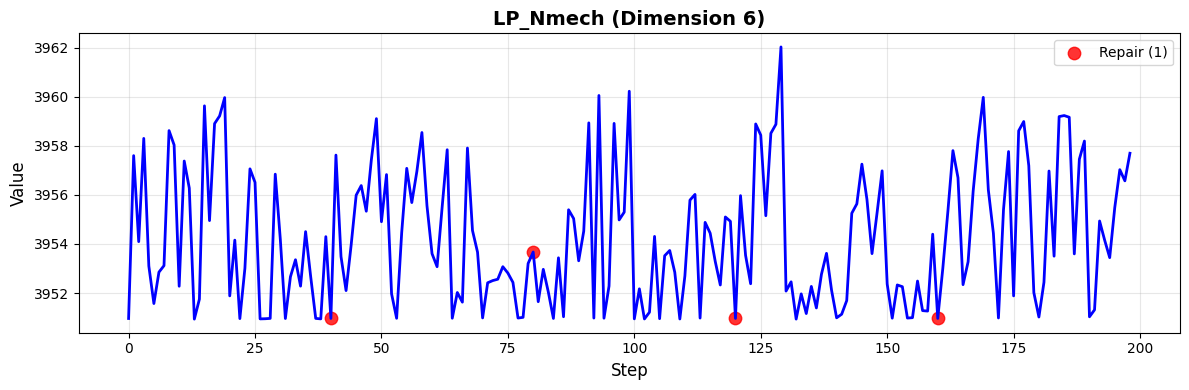

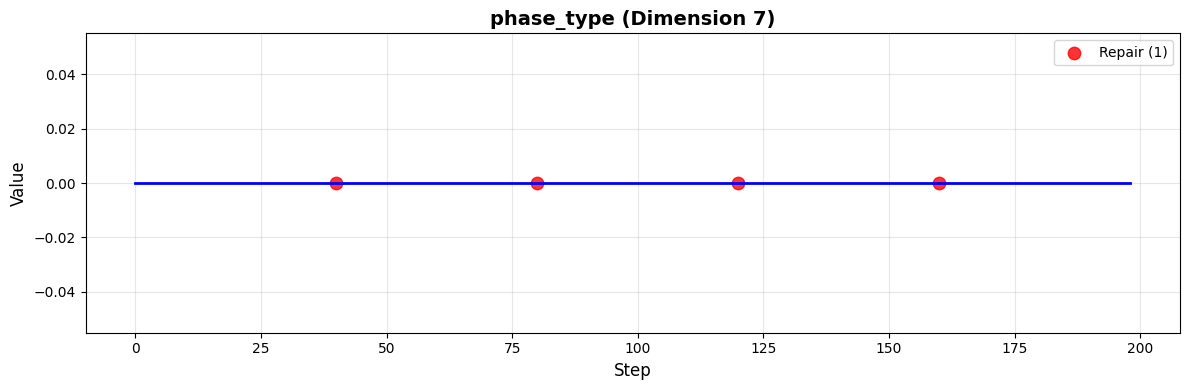

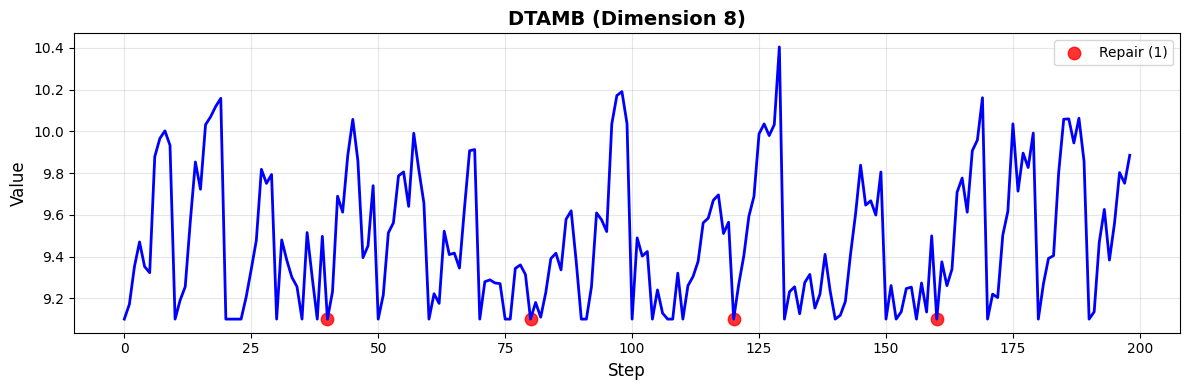

In [5]:
from student_client.plotting import plot_observations

plot_observations(
        observations=observations,
        actions=actions,
        title="Simple Policy - Observation Dimensions Over Time"
    )

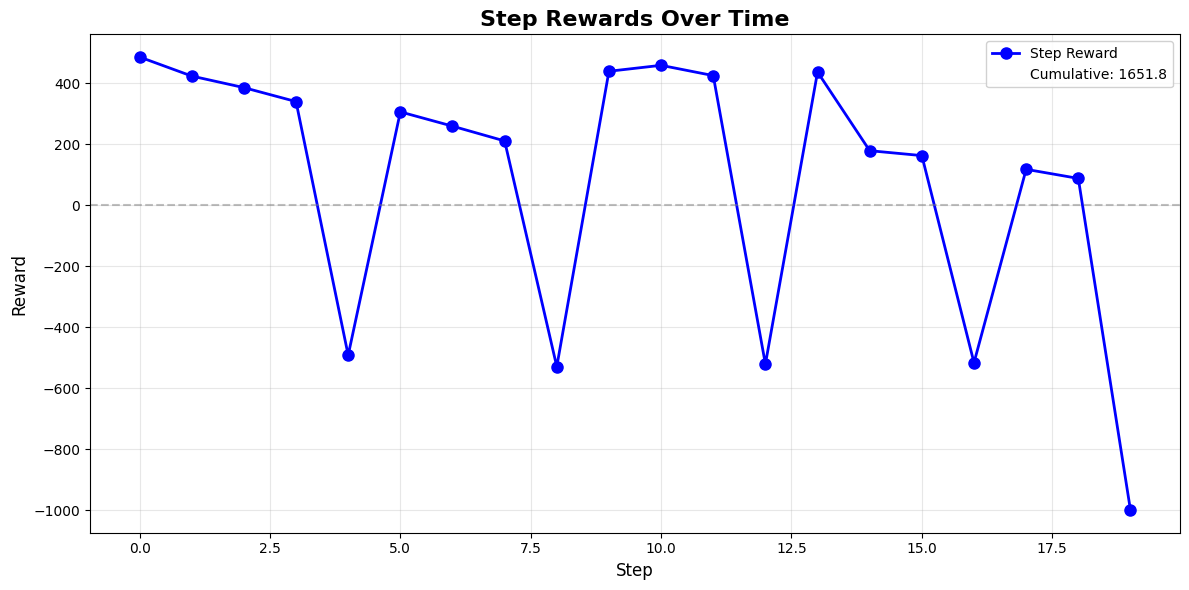

📊 Reward Statistics:
   Total Steps: 20
   Total Reward: 1651.80
   Average Reward: 82.59
   Max Reward: 485.65
   Min Reward: -1000.00


In [6]:
from student_client.plotting import plot_rewards

plot_rewards(rewards=rewards)